# Questao 1
O conjunto de microdados do ENEM 2022 possui 3.476.105 linhas, uma numerosidade muito grande para nosso contexto. Sua primeira tarefa é fazer a leitura do arquivo CSV por blocos e então realizar filtragem e amostragem em cada bloco para diminuir a numerosidade, salvando ao final um CSV com numerosidade reduzida. Tente alcançar uma tabela entre 50mil e 100mil linhas.
Para leitura por blocos, use a opção chunksize de read_csv

In [10]:
import pandas as pd

uf = ['AL', 'BA', 'CE', 'SE', 'RN', 'PI', 'PB', 'PE', 'MA']

db = pd.read_csv('micro_dados/MICRODADOS_ENEM_2022.csv', encoding="cp1252",delimiter=";")
db.dropna(subset='SG_UF_ESC', inplace=True)
db_nordeste = db[(db["SG_UF_ESC"] == 'AL') | (db["SG_UF_ESC"] == 'BA') | (db["SG_UF_ESC"] == 'CE') | (db["SG_UF_ESC"] == 'SE') | (db["SG_UF_ESC"] == 'RN') | (db["SG_UF_ESC"] ==  'PI') | (db["SG_UF_ESC"] == 'PB') | (db["SG_UF_ESC"] == 'PE') | (db["SG_UF_ESC"] == 'MA')]


In [11]:
print(len(db_nordeste))
print(db_nordeste.shape)

299663
(299663, 76)


In [13]:
db_nordeste.to_csv("base_dados_ml_nordeste.csv",encoding="cp1252")


Load data

In [14]:
import pandas as pd
db = pd.read_csv('base_dados_ml_nordeste.csv', encoding="cp1252")
db.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', '

# Questão 2

Com base no conjunto de dados reduzido, crie um subconjunto de dados, que será utilizado para predição da faixa de notas de uma prova do ENEM.

## a)
Para este subconjunto escolha um atributo de nota de uma das provas do ENEM, selecione também 10 outros atributos não relacionados às provas (não pertencentes aos atributos da seção Dados da Prova Objetiva nem da seção Dados da Redação). 


resp: 
TP_FAIXA_ETARIA(Faixa etária):  impacto de uma idade mais jovem têm consequência nas notas por conta de uma possível saída mais próxima do ensino médio, tendo assuntos mais 'frescos'

Q002(Escolaridade da mãe): ???????

TP_ESTADO_CIVIL(Estado civil): enntende-se que diferentes estados civiels podem trazer diferentes responsabilidades, que alterem padroes de estudo e possam alterar valor de nota

TP_ST_CONCLUSAO(Situação de conclusão do ensino médio): pela situação de conclusao espera-se ter uma ideaia de preparo tecnico par o enem

TP_ESCOLA(Tipo escola do ensino médio): uma preconceito de que diferentes tipos de escola podem trazer diferentes preparações para alunos

Q005(Quantas pessoas moram na sua residência): a quantidade de pessoas na casa poderia alterar padroes de estudo dentre outros que altere a nota

Q006(Renda mensal familiar): familias de certas faixas de renda teriam acesso diferente de preparo e acesso a informação logo alteraria o proparo do aluno a prova

Q021(Tem TV por assinatura): exposição do aluno a noticias e conhecimentos em geral, que pode alterar nota de redação

Q024(Tem computador): exposição do aluno a noticias e conhecimentos em geral, que pode alterar nota de redação

Q025(Tem internet): exposição do aluno a noticias e conhecimentos em geral, que pode alterar nota de redação

array([[<Axes: title={'center': 'TP_FAIXA_ETARIA'}>,
        <Axes: title={'center': 'TP_ESCOLA'}>,
        <Axes: title={'center': 'Q006'}>],
       [<Axes: title={'center': 'Q024'}>,
        <Axes: title={'center': 'Q025'}>,
        <Axes: title={'center': 'TP_SEXO'}>],
       [<Axes: title={'center': 'TP_ESTADO_CIVIL'}>,
        <Axes: title={'center': 'Q021'}>,
        <Axes: title={'center': 'TP_ST_CONCLUSAO'}>],
       [<Axes: title={'center': 'Q005'}>,
        <Axes: title={'center': 'Q022'}>, <Axes: >]], dtype=object)

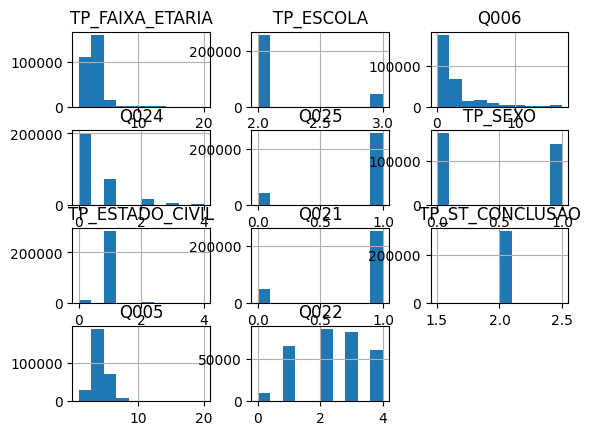

In [33]:
colunas = [ "TP_FAIXA_ETARIA", 'TP_ESCOLA', 'Q006', 'Q024', 'Q025', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'Q021', 'TP_ST_CONCLUSAO', 'Q005', 'Q022']

db_ = db.get(colunas).copy()

db_['TP_SEXO'] = (db_['TP_SEXO'] == 'M')* 1
db_['Q021'] = (db_['Q021'] == 'A')* 1
Qs = ['Q025','Q024','Q006','Q022']
for q in Qs:
  db_[q]= db_[q].apply(lambda x: ord(x) - ord('A'))
db_.hist(bins=10)


In [24]:
for col in colunas:
  print(f"Valores para {col}: ",dict(db_[col].value_counts()))
  print()


Valores para TP_FAIXA_ETARIA:  {3: 126888, 2: 108415, 4: 33535, 5: 11846, 6: 4349, 1: 3675, 11: 2163, 7: 2108, 8: 1339, 12: 1321, 13: 1052, 9: 892, 10: 724, 14: 618, 15: 350, 16: 189, 17: 131, 18: 42, 19: 19, 20: 7}

Valores para TP_ESCOLA:  {2: 254345, 3: 45318}

Valores para Q006:  {1: 144406, 2: 43728, 0: 28287, 3: 23518, 4: 13652, 6: 8903, 7: 8886, 5: 7422, 8: 3641, 16: 2608, 9: 2577, 11: 2419, 12: 2325, 15: 1830, 14: 1829, 10: 1824, 13: 1808}

Valores para Q024:  {0: 200448, 1: 73204, 2: 16425, 3: 6515, 4: 3071}

Valores para Q025:  {1: 255073, 0: 44590}

Valores para TP_SEXO:  {0: 162234, 1: 137429}

Valores para TP_ESTADO_CIVIL:  {1: 283258, 0: 11369, 2: 3046, 3: 1879, 4: 111}

Valores para Q021:  {1: 250322, 0: 49341}

Valores para TP_ST_CONCLUSAO:  {2: 299663}

Valores para Q005:  {4: 109229, 3: 78950, 5: 52719, 2: 27469, 6: 18392, 7: 6583, 8: 2731, 1: 1441, 9: 1012, 10: 610, 11: 175, 12: 151, 13: 67, 14: 50, 20: 27, 15: 23, 16: 15, 17: 9, 19: 6, 18: 4}



Apartir deste histograma excluimos: TP_ST_CONCLUSAO 
e adicionamos:

<Axes: >

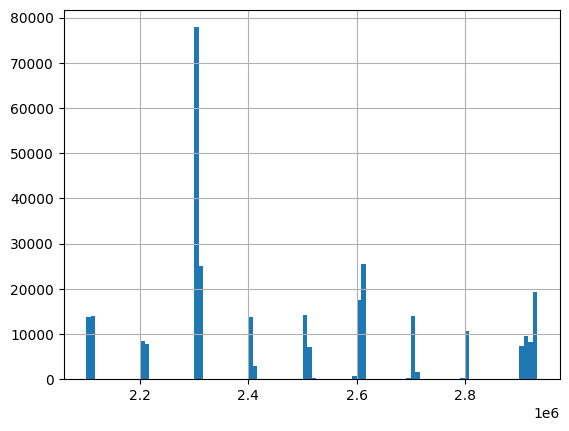

In [26]:
  db['CO_MUNICIPIO_ESC'].hist(bins=100)

<Axes: >

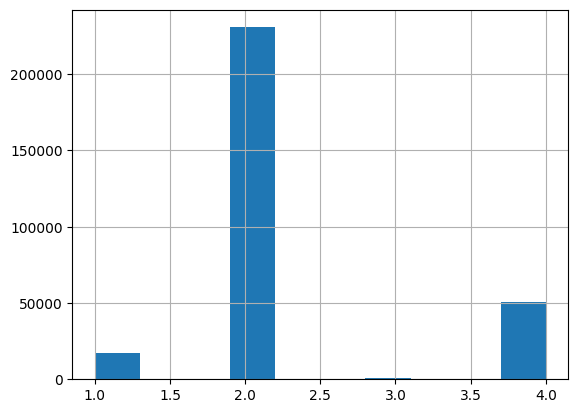

In [28]:
db['TP_DEPENDENCIA_ADM_ESC'].value_counts()
db['TP_DEPENDENCIA_ADM_ESC'].hist(bins=10)

## b)

Para o atributo de nota da prova escolhida, crie um novo atributo com a discretização da nota em 4 quartis (apresente os valores delimitantes), e seleciona somente as linhas pertencentes ao primeiro e ao quarto quartil. 


In [38]:
dados = db['NU_NOTA_REDACAO'].describe()
dados = dados['25%'],dados['75%']
colunas = [ "TP_FAIXA_ETARIA", 'TP_ENSINO', 'Q006','Q024','Q025','TP_SEXO', 'TP_ESTADO_CIVIL','Q021', 'TP_ST_CONCLUSAO','Q005']
db_ = db[((db['NU_NOTA_REDACAO'] != 0) & (db['NU_NOTA_REDACAO'] < dados[0])) | (db['NU_NOTA_REDACAO'] > dados[1])].get(colunas).copy()
db_['result'] = (db['NU_NOTA_REDACAO'] > dados[1]) *1
db_['result']

6        0
8        1
10       0
11       0
15       0
        ..
54584    0
54585    1
54588    0
54595    0
54596    1
Name: result, Length: 17091, dtype: int32

## c)

Analise os demais atributos, verifique os valores existentes e sua distribuição, verifique a existência de dados ausentes. Determine e realize os procedimentos de pré-processamento necessários. Pode ser necessário transformar atributos categóricos (por exemplo, transformando alguns valores categóricos em um valor único, ou aplicando one-hot-encoding). Pode ser necessário normalizar ou padronizar atributos. Pode haver demanda de imputar valores ou excluir linhas com dados ausentes. Você pode também criar/transformar outros atributos (por exemplo, discretizando valores numéricos, combinando dois atributos em um único atributo).


In [39]:
db_.dropna(inplace=True)
db_['result'].sum(),db_.shape

(3173, (5332, 11))

In [40]:
db_['TP_SEXO'] = (db_['TP_SEXO'] == 'M')* 1
db_['Q021'] = (db_['Q021'] == 'A')* 1
db_.drop(db_[db_['TP_ESTADO_CIVIL'] == 0].index,inplace=True )
db_.drop(db_[db_['TP_ESCOLA'] == 1].index,inplace=True )
db_['Q025']= db_['Q025'].apply(lambda x: ord(x) - ord('A'))
db_['Q024']= db_['Q024'].apply(lambda x: ord(x) - ord('A'))
db_['Q006']= db_['Q006'].apply(lambda x: ord(x) - ord('A'))

In [41]:
db_

,TP_FAIXA_ETARIA,TP_ENSINO,Q006,Q024,Q025,TP_SEXO,TP_ESTADO_CIVIL,Q021,TP_ST_CONCLUSAO,Q005,result
10,3,1.0,B,B,B,0,0,1,2,4,0
15,3,1.0,D,A,B,0,1,1,2,3,0
35,4,1.0,D,B,B,0,1,1,2,5,0
44,3,1.0,H,C,B,1,1,1,2,4,1
55,5,1.0,B,A,B,0,1,0,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...
54557,3,1.0,C,B,B,1,1,1,2,3,1
54559,2,1.0,D,A,B,0,1,1,2,4,1
54579,3,1.0,I,B,B,1,0,0,2,4,0
54580,3,1.0,H,B,B,0,1,0,2,6,0
